Reformatted code blocks to allow graph viewing without interact (mines broken)

In [1]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from ipywidgets import interact, widgets, Dropdown, interactive
from statsmodels.tsa.arima.model import ARIMA
import warnings
from IPython.display import display
warnings.filterwarnings("ignore")

In [2]:
# define clothing items for filtering
clothing_items = [
    'Tunic', 'Tank Top', 'Leggings', 'Onesie', 'Jacket', 'Trousers', 'Jeans',
    'Pajamas', 'Trench Coat', 'Poncho', 'Romper', 'T-shirt', 'Shorts',
    'Blazer', 'Hoodie', 'Sweater', 'Blouse', 'Swimsuit', 'Kimono', 'Cardigan',
    'Dress', 'Camisole', 'Flannel Shirt', 'Polo Shirt', 'Overalls', 'Coat',
    'Vest', 'Jumpsuit', 'Raincoat', 'Skirt', 'Pants'
]

# function to load and preprocess dataset
def load_and_clean_data(csv_path="retail_sales.csv"):
    df = pd.read_csv(csv_path)
    df['date'] = pd.to_datetime(df['date'])
    df = df.dropna(subset=['amount_usd'])
    #df['review'] = df.groupby('item')['review'].transform(lambda x: x.fillna(x.mean()))
    df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
    df = df[df['item'].isin(clothing_items)].copy()
    return df

# load once and reuse
df = load_and_clean_data()
df

,customerID,item,amount_usd,date,review,payment,month
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,2023-07-01
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,2023-03-01
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,2023-03-01
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card,2022-12-01
6,4055,Jacket,2571.0,2023-07-08,1.3,Cash,2023-07-01
...,...,...,...,...,...,...,...
3388,4094,Trench Coat,17.0,2023-02-13,2.5,Credit Card,2023-02-01
3392,3981,Sweater,99.0,2022-10-25,4.5,Cash,2022-10-01
3393,4110,Polo Shirt,42.0,2022-10-15,4.0,Cash,2022-10-01
3394,4040,Tank Top,113.0,2023-01-20,1.2,Credit Card,2023-01-01


OUT OF DATE

In [3]:
# define clothing items for filtering
clothing_items = [
    'Tunic', 'Tank Top', 'Leggings', 'Onesie', 'Jacket', 'Trousers', 'Jeans',
    'Pajamas', 'Trench Coat', 'Poncho', 'Romper', 'T-shirt', 'Shorts',
    'Blazer', 'Hoodie', 'Sweater', 'Blouse', 'Swimsuit', 'Kimono', 'Cardigan',
    'Dress', 'Camisole', 'Flannel Shirt', 'Polo Shirt', 'Overalls', 'Coat',
    'Vest', 'Jumpsuit', 'Raincoat', 'Skirt', 'Pants'
]

# function to load and preprocess dataset
def load_and_clean_data(csv_path="retail_sales.csv"):
    df = pd.read_csv(csv_path)
    df['date'] = pd.to_datetime(df['date'])
    df = df.dropna(subset=['amount_usd'])
    df['review'] = df.groupby('item')['review'].transform(lambda x: x.fillna(x.mean()))
    df['amount_usd'] = df.groupby('item')['amount_usd'].transform(lambda x: x.fillna(x.mean()))
    df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
    df = df[df['item'].isin(clothing_items)].copy()
    return df

# load once and reuse
df = load_and_clean_data()
df

,customerID,item,amount_usd,date,review,payment,month
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,2023-07-01
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,2023-03-01
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,2023-03-01
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card,2022-12-01
6,4055,Jacket,2571.0,2023-07-08,1.3,Cash,2023-07-01
...,...,...,...,...,...,...,...
3388,4094,Trench Coat,17.0,2023-02-13,2.5,Credit Card,2023-02-01
3392,3981,Sweater,99.0,2022-10-25,4.5,Cash,2022-10-01
3393,4110,Polo Shirt,42.0,2022-10-15,4.0,Cash,2022-10-01
3394,4040,Tank Top,113.0,2023-01-20,1.2,Credit Card,2023-01-01


In [4]:
# load the dataset
df = load_and_clean_data()

# create user-item review matrix
user_item_matrix = df.pivot_table(index='customerID', columns='item', values='review', aggfunc='mean')
user_item_filled = user_item_matrix.fillna(0)
item_user_matrix = user_item_filled.T

# compute cosine similarity between items
item_similarity_matrix = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=item_user_matrix.index, columns=item_user_matrix.index)

item_similarity_df

item,Blazer,Blouse,Camisole,Cardigan,Coat,Dress,Flannel Shirt,Hoodie,Jacket,Jeans,...,Shorts,Skirt,Sweater,Swimsuit,T-shirt,Tank Top,Trench Coat,Trousers,Tunic,Vest
item,,,,,,,,,,,,,,,,,,,,,
Blazer,1.000000,0.269034,0.295436,0.242722,0.299525,0.251524,0.282525,0.319720,0.364543,0.195559,...,0.338580,0.258742,0.285589,0.123033,0.210132,0.320071,0.357494,0.269032,0.266801,0.260543
Blouse,0.269034,1.000000,0.209378,0.328976,0.297133,0.194275,0.170113,0.245565,0.192634,0.145043,...,0.281821,0.203784,0.223863,0.260894,0.278332,0.262419,0.249910,0.195779,0.195182,0.299700
Camisole,0.295436,0.209378,1.000000,0.292431,0.344939,0.200492,0.246504,0.313322,0.282745,0.269769,...,0.193334,0.318110,0.310471,0.314169,0.242314,0.318242,0.224845,0.195373,0.168815,0.320797
Cardigan,0.242722,0.328976,0.292431,1.000000,0.163898,0.225151,0.214330,0.313503,0.376980,0.143659,...,0.256129,0.199026,0.263105,0.302722,0.318166,0.288822,0.293961,0.290540,0.293223,0.166311
Coat,0.299525,0.297133,0.344939,0.163898,1.000000,0.233803,0.171412,0.245120,0.273791,0.279755,...,0.205922,0.288875,0.157241,0.184416,0.194902,0.173814,0.139846,0.230629,0.266812,0.337774
Dress,0.251524,0.194275,0.200492,0.225151,0.233803,1.000000,0.202205,0.269103,0.209228,0.236610,...,0.240913,0.314591,0.217736,0.262293,0.256921,0.371892,0.184842,0.180716,0.329242,0.264302
Flannel Shirt,0.282525,0.170113,0.246504,0.214330,0.171412,0.202205,1.000000,0.189765,0.282555,0.235418,...,0.308304,0.272351,0.399347,0.175329,0.265681,0.160423,0.319639,0.271641,0.336158,0.178089
Hoodie,0.319720,0.245565,0.313322,0.313503,0.245120,0.269103,0.189765,1.000000,0.252810,0.164609,...,0.205073,0.284394,0.282427,0.219530,0.277828,0.255405,0.287033,0.216589,0.227414,0.268333
Jacket,0.364543,0.192634,0.282745,0.376980,0.273791,0.209228,0.282555,0.252810,1.000000,0.177811,...,0.208519,0.199531,0.241310,0.197381,0.173454,0.240491,0.267008,0.184581,0.219295,0.224277


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# We'll use the df_sample from earlier (pretending it's the user's actual df)
# Step 1: Create user-item review matrix
user_item_matrix = df.pivot_table(index='customerID', columns='item', values='review', aggfunc='mean')

# Step 2: Convert to numpy array, center by item (column), but preserve NaNs
item_mat = user_item_matrix.to_numpy()
item_means = np.nanmean(item_mat, axis=0)
item_mat_centered = item_mat - item_means  # this will preserve NaNs

# Step 3: Compute cosine similarity only using shared (non-NaN) ratings
item_names = user_item_matrix.columns
n_items = item_mat_centered.shape[1]
item_similarity_df = pd.DataFrame(index=item_names, columns=item_names, dtype=float)

for i in range(n_items):
    for j in range(n_items):
        vec_i = item_mat_centered[:, i]
        vec_j = item_mat_centered[:, j]

        shared = ~np.isnan(vec_i) & ~np.isnan(vec_j)

        if np.sum(shared) > 1:
            sim = cosine_similarity(vec_i[shared].reshape(1, -1), vec_j[shared].reshape(1, -1))[0, 0]
        else:
            sim = np.nan

        item_similarity_df.iloc[i, j] = sim

item_similarity_df

item,Blazer,Blouse,Camisole,Cardigan,Coat,Dress,Flannel Shirt,Hoodie,Jacket,Jeans,...,Shorts,Skirt,Sweater,Swimsuit,T-shirt,Tank Top,Trench Coat,Trousers,Tunic,Vest
item,,,,,,,,,,,,,,,,,,,,,
Blazer,1.000000,0.613506,-0.037886,-0.325033,0.259020,0.066242,0.063449,0.118534,0.099268,0.352119,...,-0.039342,0.179899,0.315585,-0.815656,0.011009,0.337508,-0.388931,0.149361,0.167213,0.072340
Blouse,0.613506,1.000000,-0.127418,-0.137590,-0.018213,-0.176739,0.236349,0.140696,0.546358,0.406577,...,0.525952,-0.450925,0.145300,-0.292161,0.104178,-0.272933,-0.045831,0.217683,0.054493,0.035683
Camisole,-0.037886,-0.127418,1.000000,0.536624,0.188549,0.370970,0.420270,0.127050,-0.126953,0.248921,...,0.270832,0.078684,-0.111787,0.244393,0.252145,0.077898,0.555700,0.460412,-0.100861,-0.198166
Cardigan,-0.325033,-0.137590,0.536624,1.000000,0.036681,0.378272,0.154291,-0.160901,-0.195337,-0.390998,...,-0.348528,-0.038159,-0.134749,-0.091426,0.351983,-0.138949,-0.020708,-0.437312,-0.405032,-0.221577
Coat,0.259020,-0.018213,0.188549,0.036681,1.000000,-0.322471,0.225955,0.184268,-0.587789,-0.108071,...,0.439758,-0.082531,-0.703612,0.194207,0.414359,0.472660,-0.190402,-0.334232,0.513978,0.035437
Dress,0.066242,-0.176739,0.370970,0.378272,-0.322471,1.000000,0.459280,-0.140405,0.120283,-0.214259,...,-0.075904,0.180964,-0.105547,-0.225323,-0.268401,0.091954,-0.067197,-0.116869,-0.209117,-0.457003
Flannel Shirt,0.063449,0.236349,0.420270,0.154291,0.225955,0.459280,1.000000,-0.276561,0.248943,-0.074626,...,0.256468,0.355701,0.147627,0.312887,-0.267070,0.075576,-0.174452,0.332925,0.275561,0.059581
Hoodie,0.118534,0.140696,0.127050,-0.160901,0.184268,-0.140405,-0.276561,1.000000,0.078242,0.261148,...,0.057316,-0.099126,-0.067062,0.547459,0.035324,-0.225263,0.209276,-0.148083,-0.050539,-0.134125
Jacket,0.099268,0.546358,-0.126953,-0.195337,-0.587789,0.120283,0.248943,0.078242,1.000000,0.485097,...,-0.421419,-0.136521,0.358348,0.069086,-0.398051,-0.413388,-0.334037,0.293137,-0.097857,0.121013


In [ ]:
item_mat

array([[nan, 2.1, 4.7, ..., nan, nan, 3.2],
       [nan, 3.3, nan, ..., nan, 1.1, nan],
       [1.8, nan, nan, ..., 4.5, nan, nan],
       ...,
       [nan, nan, nan, ..., 2. , 1.2, nan],
       [nan, 4.6, nan, ..., 3.4, nan, nan],
       [4.6, nan, 4.2, ..., nan, nan, nan]])

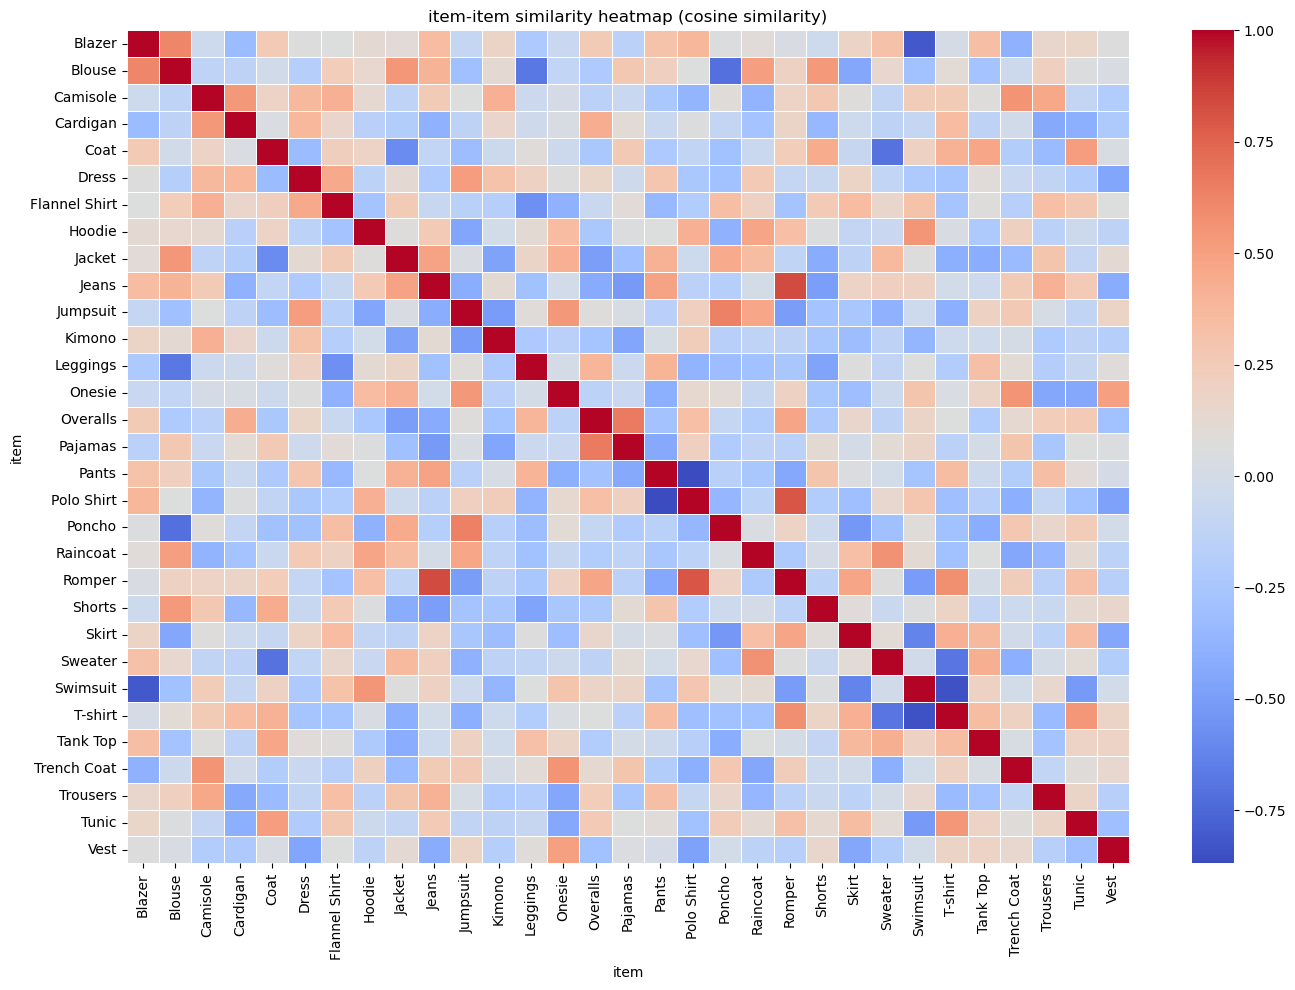

In [8]:
# plot heatmap of item similarity
plt.figure(figsize=(14, 10))
sns.heatmap(item_similarity_df, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5,
            xticklabels=item_similarity_df.columns, yticklabels=item_similarity_df.index)
plt.title("item-item similarity heatmap (cosine similarity)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("item-item-heatmap.png", bbox_inches='tight')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Create user-item review matrix
user_item_matrix = df.pivot_table(index='customerID', columns='item', values='review', aggfunc='mean')

# Step 2: Fill missing with 0 (or leave NaN depending on strategy)
user_item_filled = user_item_matrix.fillna(0)

# Step 3: Transpose to item-user (each row = item vector across users)
item_user_matrix = user_item_filled.T

# Step 4: Center and scale each item vector
scaler = StandardScaler(with_mean=True, with_std=True)
item_user_scaled = scaler.fit_transform(item_user_matrix)

# Step 5: Compute cosine similarity manually or with sklearn
item_similarity_matrix = cosine_similarity(item_user_scaled)

# Step 6: Store in a DataFrame
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=item_user_matrix.index, columns=item_user_matrix.index)

item_similarity_df


item,Blazer,Blouse,Camisole,Cardigan,Coat,Dress,Flannel Shirt,Hoodie,Jacket,Jeans,...,Shorts,Skirt,Sweater,Swimsuit,T-shirt,Tank Top,Trench Coat,Trousers,Tunic,Vest
item,,,,,,,,,,,,,,,,,,,,,
Blazer,1.000000,-0.042647,-0.048702,-0.067459,0.042011,-0.059204,-0.007822,-0.003825,0.073937,-0.102250,...,0.036745,-0.038421,-0.036108,-0.188733,-0.102325,-0.020347,0.087474,0.006196,-0.023751,-0.073958
Blouse,-0.042647,1.000000,-0.106959,0.036843,0.048269,-0.061680,-0.082733,-0.058582,-0.082338,-0.144813,...,-0.040515,-0.116777,-0.052414,0.017305,-0.018133,-0.080033,-0.033556,-0.029965,-0.108141,0.008795
Camisole,-0.048702,-0.106959,1.000000,-0.031530,0.094975,-0.127603,-0.053380,-0.012679,-0.032676,-0.001845,...,-0.159413,-0.012622,0.047503,0.019137,-0.058813,-0.025881,-0.082842,-0.089790,-0.165654,0.040633
Cardigan,-0.067459,0.036843,-0.031530,1.000000,-0.149087,-0.089621,-0.114730,0.044284,0.119003,-0.173260,...,-0.086623,-0.141501,-0.011940,0.010332,0.049369,-0.022329,-0.028292,0.032546,-0.024577,-0.150341
Coat,0.042011,0.048269,0.094975,-0.149087,1.000000,0.025366,-0.094802,-0.051134,0.018203,0.032038,...,-0.073152,-0.017139,-0.096922,-0.060285,-0.095121,-0.179489,-0.167289,0.023348,0.008438,0.085074
Dress,-0.059204,-0.061680,-0.127603,-0.089621,0.025366,1.000000,-0.074868,-0.005371,-0.063261,0.004617,...,-0.081271,-0.037098,-0.071415,0.038396,-0.024620,0.051924,-0.099654,-0.055066,0.082502,0.010690
Flannel Shirt,-0.007822,-0.082733,-0.053380,-0.114730,-0.094802,-0.074868,1.000000,-0.163470,0.000802,0.011474,...,0.024813,-0.042012,0.155647,-0.090768,0.011973,-0.209526,0.078899,0.045556,0.116887,-0.126943
Hoodie,-0.003825,-0.058582,-0.012679,0.044284,-0.051134,-0.005371,-0.163470,1.000000,-0.037004,-0.112153,...,-0.150948,-0.022408,-0.024756,-0.076799,-0.023626,-0.093530,-0.011263,-0.015738,-0.083207,-0.016262
Jacket,0.073937,-0.082338,-0.032676,0.119003,0.018203,-0.063261,0.000802,-0.037004,1.000000,-0.070873,...,-0.130850,-0.145475,-0.000045,-0.082835,-0.121573,-0.070078,-0.030036,-0.055581,-0.058002,-0.090668


In [ ]:
# plot heatmap of item similarity
plt.figure(figsize=(14, 10))
sns.heatmap(item_similarity_df, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5,
            xticklabels=item_similarity_df.columns, yticklabels=item_similarity_df.index)
plt.title("item-item similarity heatmap (cosine similarity)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("item-item-heatmap.png", bbox_inches='tight')
plt.show()

In [ ]:
#MANUAL SIMILARITY MATRIX
user_item_matrix = df.pivot_table(index='customerID', columns='item', values='review', aggfunc='mean').fillna(0)
item_user_matrix = user_item_matrix.T
import numpy as np
manual_similarity = pd.DataFrame(index=item_user_matrix.index, columns=item_user_matrix.index)

for item_i in item_user_matrix.index:
    for item_j in item_user_matrix.index:
        vec_i = item_user_matrix.loc[item_i].values
        vec_j = item_user_matrix.loc[item_j].values
        
        dot_product = np.dot(vec_i, vec_j)
        norm_i = np.linalg.norm(vec_i)
        norm_j = np.linalg.norm(vec_j)
        
        if norm_i == 0 or norm_j == 0:
            similarity = 0  
        else:
            similarity = dot_product / (norm_i * norm_j)
        
        manual_similarity.loc[item_i, item_j] = similarity
manual_similarity = manual_similarity.astype(float)
print(manual_similarity)

In [ ]:
# plot heatmap of item similarity
plt.figure(figsize=(14, 10))
sns.heatmap(manual_similarity, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5,
            xticklabels=item_similarity_df.columns, yticklabels=item_similarity_df.index)
plt.title("item-item similarity heatmap (cosine similarity)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("item-item-heatmap.png", bbox_inches='tight')
plt.show()

In [ ]:
df['month'] = pd.to_datetime(df['date']).dt.to_period("M")
ts_sales = df.groupby(['item', 'month']).agg(
    Total_Sales=('amount_usd', 'sum')
).reset_index()
ts_sales['month'] = ts_sales['month'].dt.to_timestamp()

# Plotly graph Time Series
fig = go.Figure()

for item in ts_sales['item'].unique():
    item_data = ts_sales[ts_sales['item'] == item]
    fig.add_trace(go.Scatter(
        x=item_data['month'],
        y=item_data['Total_Sales'],
        mode='lines+markers',
        name=item,
        hoverinfo='text',
        text=[f"Item: {item}<br>Sales: ${val}" for val in item_data['Total_Sales']],
        line=dict(width=2),
        opacity=0.6
    ))

fig.update_layout(
    title="Total Sales Over Time by Item",
    xaxis_title="Month",
    yaxis_title="Total Sales (USD)",
    hovermode='x unified',
    template='plotly_white',
    height=500
)

fig.show()

In [ ]:
# function to find and print top-n similar items based on cosine similarity
def find_similar_items(item_name, top_n=5):
    # convert input to lowercase for case-insensitive matching
    item_name_lower = item_name.lower()
    all_items = list(item_similarity_df.columns)
    
    # match the input item ignoring case
    matched_items = [item for item in all_items if item.lower() == item_name_lower]
    
    if not matched_items:
        print(f"item '{item_name}' not found. please check the spelling or try another item.")
        return
    
    matched_item = matched_items[0]
    
    # get top n similar items
    similar_items = item_similarity_df[matched_item].drop(matched_item).sort_values(ascending=False).head(top_n)
    print(f"\ntop {top_n} items similar to '{matched_item}':")
    for similar_item, score in similar_items.items():
        print(f"{similar_item}: similarity score = {score:.2f}")

# prompt user to input item and number of similar items to display
user_input = input("enter an item name to find similar products: ").strip()
n = int(input("how many similar items do you want to see? (default 5): ") or 5)

find_similar_items(user_input, top_n=n)


In [ ]:
# count total number of sales
total_sales = len(df)

# count number of unique items
unique_items = df['item'].nunique()

# count item frequency
item_counts = df['item'].value_counts()

# display results
print(f"\ntotal number of sales: {total_sales}")
print(f"number of unique items: {unique_items}")
print("\nitems sold (sorted by quantity):")
print(item_counts)


In [ ]:
# group by item and month: sum of sales and units sold
ts_sales_full = df.groupby(['item', 'month']).agg(
    Total_Sales=('amount_usd', 'sum'),
    Units_Sold=('item', 'count')
).reset_index()
ts_sales_full['month'] = ts_sales_full['month'].dt.to_timestamp()

# dropdown options
items_list = sorted(ts_sales_full['item'].unique())

# plot function (single item)
def plot_single_item(selected_item):
    if not selected_item:
        return

    item_data = ts_sales_full[ts_sales_full['item'] == selected_item]
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=item_data['month'],
        y=item_data['Total_Sales'],
        mode='lines+markers',
        name=selected_item,
        customdata=item_data[['Units_Sold']],
        hovertemplate=(
            f"<b>{selected_item}</b><br>" +
            "month: %{x|%b %Y}<br>" +
            "sales: $%{y:.2f}<br>" +
            "units sold: %{customdata[0]}<extra></extra>"
        ),
        line=dict(width=2)
    ))
    
    fig.update_layout(
        title=f"Seasonal Sales Trend: {selected_item}",
        xaxis_title="Month",
        yaxis_title="Total Sales (USD)",
        hovermode='closest',
        template='plotly_white',
        height=600
    )
    
    from IPython.display import display
    display(fig)

# single-select dropdown widget
single_dropdown = widgets.Dropdown(
    options=items_list,
    description='Choose item:',
    style={'description_width': 'initial'},
    layout={'width': '50%'}
)

# connect and display the widget
plot_ui = interactive(plot_single_item, selected_item=single_dropdown)
display(plot_ui)


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from ipywidgets import Dropdown
from IPython.display import display

# create monthly total sales dataframe
monthly_sales = df.groupby(['item', 'month']).agg(
    Total_Sales=('amount_usd', 'sum')
).reset_index()

# define forecast function
def forecast_item(item_name, periods=6):
    item_data = monthly_sales[monthly_sales['item'] == item_name].copy()
    item_data['month'] = item_data['month'].dt.to_timestamp()
    item_data = item_data.set_index('month').resample('M').sum().fillna(0)

    model = ARIMA(item_data['Total_Sales'], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.get_forecast(steps=periods)
    
    forecast_index = pd.date_range(item_data.index[-1] + pd.DateOffset(months=1), periods=periods, freq='M')
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=item_data.index, y=item_data['Total_Sales'],
                             mode='lines+markers', name='historical sales'))
    fig.add_trace(go.Scatter(x=forecast_index, y=forecast.predicted_mean,
                             mode='lines+markers', name='forecasted sales'))
    
    fig.update_layout(
        title=f"Sales Forecast for {item_name}",
        xaxis_title="Month",
        yaxis_title="Total Sales (USD)",
        template="plotly_white"
    )
    fig.show()

# plain dropdown
item_dropdown = Dropdown(
    options=sorted(monthly_sales['item'].unique()),
    description='Select item:',
    layout={'width': '50%'}
)

# display dropdown and trigger function manually
display(item_dropdown)

In [ ]:
forecast_item(item_dropdown.value)

In [ ]:
# find peak sales month for each item
peak_months = monthly_sales.loc[
    monthly_sales.groupby('item')['Total_Sales'].idxmax()
][['item', 'month', 'Total_Sales']].sort_values(by='month')

# display peak month and sales value for each item
print(peak_months)

# this shows the single month each item had its highest total sales
# useful for identifying when to market specific products

# Ordered by month to see which items peak early in the year vs. later.
# ➤ “When should I market this product?”
# ➤ “Which items peak in summer vs. winter?”


In [ ]:
import pandas as pd
from ipywidgets import Dropdown
from IPython.display import display

# Step 1: Create binary customer-item matrix
basket = df.groupby(['customerID', 'item']).size().unstack(fill_value=0)
basket[basket > 0] = 1  # convert to binary matrix

# Step 2: Co-purchase frequency (item-item)
co_purchase = basket.T.dot(basket).fillna(0)

# Step 3: Combine with cosine similarity to score bundles
bundle_recommendations = []

for item in co_purchase.columns:
    if item not in item_similarity_df.columns:
        continue  # skip if item not in similarity matrix

    # Normalize scores
    co_score = co_purchase[item] / co_purchase[item].max()
    sim_score = item_similarity_df[item] / item_similarity_df[item].max()

    # Combine scores
    combined_score = (co_score.fillna(0) * 0.5) + (sim_score.fillna(0) * 0.5)
    top_bundle = combined_score.drop(item, errors='ignore').sort_values(ascending=False).head(3)

    for related_item, score in top_bundle.items():
        bundle_recommendations.append({
            'item': item,
            'recommended_bundle': related_item,
            'bundle_score': round(score, 3)
        })

# Step 4: Create bundle dataframe
bundle_df = pd.DataFrame(bundle_recommendations)

# Step 5: Dropdown for selecting item
bundle_dropdown = Dropdown(
    options=bundle_df['item'].unique(),
    description="Select item:",
    layout={'width': '50%'}
)
display(bundle_dropdown)

In [ ]:
top_related = bundle_df[bundle_df['item'] == bundle_dropdown.value].sort_values(by='bundle_score', ascending=False)
display(top_related[['recommended_bundle', 'bundle_score']])

In [ ]:
# segment sales by payment method and review score
# categorize review scores into bins
bins = [0, 2, 3.5, 5]
labels = ['low (<=2)', 'medium (2-3.5)', 'high (>3.5)']
df['review_level'] = pd.cut(df['review'], bins=bins, labels=labels, include_lowest=True)

# group by item, payment method, and review level
segmented_sales = df.groupby(['item', 'payment', 'review_level']).agg(
    total_sales=('amount_usd', 'sum'),
    units_sold=('item', 'count'),
    avg_review=('review', 'mean')
).reset_index().sort_values(['item', 'total_sales'], ascending=[True, False])

# display segmented results
print(segmented_sales)

# interactive dropdown to view segmented sales by item
@interact(item=Dropdown(options=sorted(segmented_sales['item'].unique()), description="item"))
def segment_view(item):
    seg_view = segmented_sales[segmented_sales['item'] == item]
    display(seg_view[['payment', 'review_level', 'total_sales', 'units_sold', 'avg_review']])

In [ ]:
from ipywidgets import Dropdown
from IPython.display import display

# Step 1: Create dropdown widget
customer_dropdown = Dropdown(
    options=sorted(df['customerID'].unique()),
    description='Customer ID:',
    layout={'width': '50%'}
)

# Step 2: Display the dropdown
display(customer_dropdown)

# Step 3: After selecting a customer, run this:
# customer_data = df[df['customerID'] == customer_dropdown.value].sort_values(by='date')
# display(customer_data[['date', 'item', 'amount_usd', 'review', 'payment']].reset_index(drop=True))


In [ ]:
customer_data = df[df['customerID'] == customer_dropdown.value].sort_values(by='date')
display(customer_data[['date', 'item', 'amount_usd', 'review', 'payment']].reset_index(drop=True))


In [ ]:
from ipywidgets import Dropdown
from IPython.display import display
import plotly.graph_objects as go

# Step 1: Create and display dropdown
review_dropdown = Dropdown(
    options=sorted(df['customerID'].unique()),
    description='Customer ID:',
    layout={'width': '50%'}
)
display(review_dropdown)


In [ ]:
# Step 2: Plot reviews for selected customer
cust_data = df[df['customerID'] == review_dropdown.value].sort_values('date')

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=cust_data['date'],
    y=cust_data['review'],
    mode='lines+markers',
    name=f"customer {review_dropdown.value}",
    text=[f"item: {item}<br>amount: ${amt:.2f}" 
          for item, amt in zip(cust_data['item'], cust_data['amount_usd'])],
    hoverinfo='text+x+y',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=f"Review Ratings Over Time for Customer {review_dropdown.value}",
    xaxis_title='Purchase Date',
    yaxis_title='Review Score',
    yaxis=dict(range=[0, 5.5]),
    template='plotly_white',
    height=400
)

fig.show()


In [ ]:
# calculate first and peak month per item
first_months = monthly_sales.groupby('item')['month'].min().reset_index(name='first_month')
peak_months = monthly_sales.loc[
    monthly_sales.groupby('item')['Total_Sales'].idxmax()
][['item', 'month']].rename(columns={'month': 'peak_month'})

# merge to compute lead time from first sale to peak sale
timing_df = pd.merge(first_months, peak_months, on='item')
timing_df['lead_time_months'] = (
    timing_df['peak_month'].dt.to_period('M') - timing_df['first_month'].dt.to_period('M')
).apply(lambda x: x.n)

# display results
print(timing_df)

# first_month: when the item first appeared in the dataset
# peak_month: when the item had its highest total sales
# lead_time_months: number of months it took to reach peak

# ➤ “How long after launch does this product usually take to become popular?”
# ➤ “How early should I introduce it before expecting strong sales?”